## ANOVA 

- We could compare the means, one by one using t-tests for difference of means.
- Problem: each test contains type I error
- The total type I error is where k is the number of means.
- For example, if there are 5 means and you use a=0.05, you must make 10 two by two comparisons.
- Thus, the type I error is $1-(.95)^{10} $, which is 0.4012.
- That is, 40% of the time you will reject the null hypothesis of equal means in favor of the alternative!

In [1]:
# Example

a = [4,3,2]

b = [2,4,6]

c = [2,1,3]

In [2]:
from scipy import stats

stats.f_oneway(a,b,c)

F_onewayResult(statistic=1.5, pvalue=0.2962962962962962)

### Pandas.melt command

- `Pd.melt` allows you to ‘unpivot’ data from a ‘wide format’ into a ‘long format’, data with each row representing a data point.

In [3]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [51]:
list = [[4,3,2],[2,4,6],[2,1,3]]




data = pd.DataFrame(list, columns=['TM1', 'TM2', 'TM3'])
data

,TM1,TM2,TM3
0,4,3,2
1,2,4,6
2,2,1,3


In [53]:
data_new = pd.melt(data.reset_index(), id_vars =['index'], value_vars = ['TM1', 'TM2', 'TM3'])
data_new.columns = ['index','Treatments','value']
data_new

,index,Treatments,value
0,0,TM1,4
1,1,TM1,2
2,2,TM1,2
3,0,TM2,3
4,1,TM2,4
5,2,TM2,1
6,0,TM3,2
7,1,TM3,6
8,2,TM3,3


In [54]:
model = ols('value ~ C(Treatments)', data =data_new).fit()

In [55]:
anova_table = sm.stats.anova_lm(model, typ = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),2.0,2.0,1.000000,0.375,0.702332
Residual,6.0,16.0,2.666667,NaN,NaN


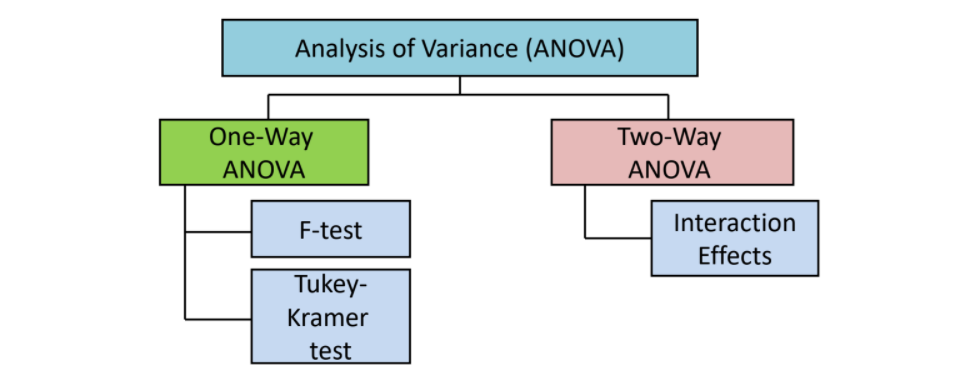

### Completely Randomized Design

- Experimental units (subjects) are assigned randomly to the different levels (groups)
  - Subjects are assumed homogeneous
- Only one factor or independent variable
  - With two or more levels (groups)
- Analyzed by one-factor analysis of variance (one-way ANOVA)

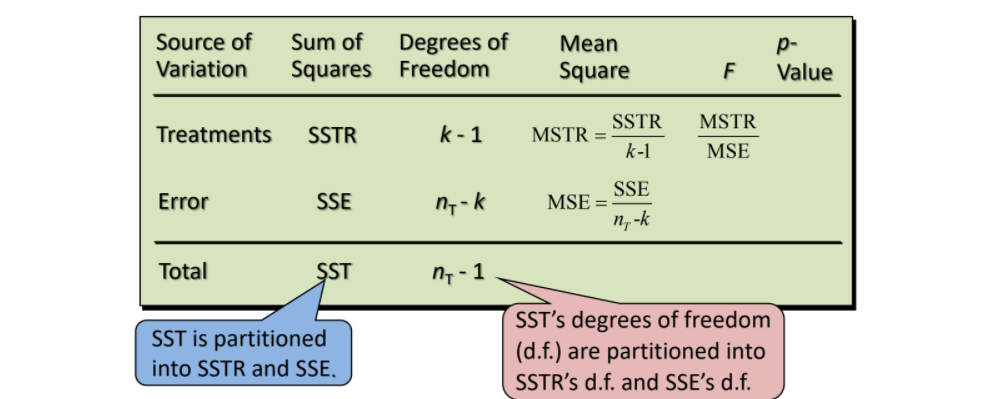

Every experiment involves a sequence of activities:
1. Conjecture—the original hypothesis that motivates the experiment
2. Experiment—the test performed to investigate the conjecture
3. Analysis—the statistical analysis of the data from the experiment
4. Conclusion—what has been learned about the original conjecture
from the experiment. Often the experiment will lead to a revised
conjecture, and a new experiment, and so forth

**Ques**
- A manufacturer of paper that is used for making grocery bags is interested in improving the tensile strength of the product
- Product engineer thinks that tensile strength is a function of the hardwood concentration in the pulp and that the range of hardwood concentrations of practical interest is between 5 and 20%.
- A team of engineers responsible for the study decides to investigate four levels of hardwood concentration: 5%, 10%, 15%, and 20%.
- They decide to make up six test specimens at each concentration level, using a pilot plant.
- All 24 specimens are tested on a laboratory tensile tester, in random order. The data from this experiment are shown in Table
- Tensile Strength of Paper (psi)

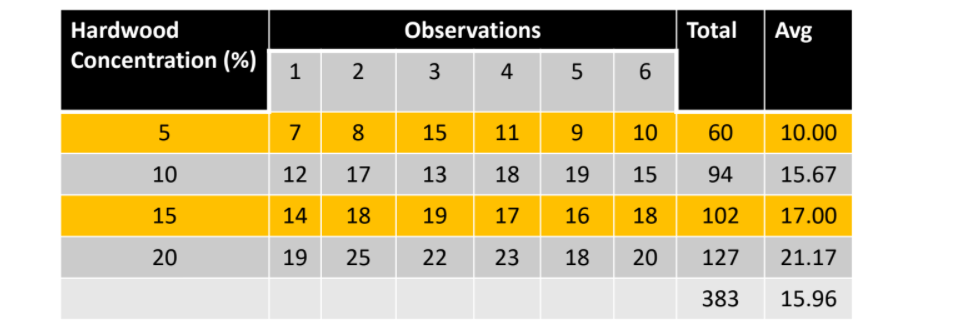

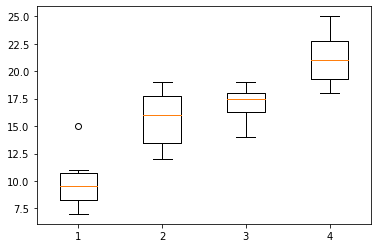

In [56]:
# Sol
fivepercent = [7,8,15,11,9,10]
tenpercent = [12,17,13,18,19,15]
fifteenpercent = [14,18,19,17,16,18]
twentypercent = [19,25,22,23,18,20]

box_plot_data = [fivepercent,tenpercent,fifteenpercent,twentypercent]
plt.boxplot(box_plot_data)
plt.show()

In [57]:
list1 = [[7,12,14,19],[8,17,18,25],[15,13,19,22],[11,18,17,23],[9,19,16,18],[10,15,18,20]]




data1 = pd.DataFrame(list1, columns=['con5', 'con10', 'co15','con20'])
data1

,con5,con10,co15,con20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [58]:
data_r1 = pd.melt(data1.reset_index(), id_vars=['index'], value_vars = ['con5', 'con10', 'co15','con20'])
data_r1.columns = ['index','treatments','value']

data_r1

,index,treatments,value
0,0,con5,7
1,1,con5,8
2,2,con5,15
3,3,con5,11
4,4,con5,9
5,5,con5,10
6,0,con10,12
7,1,con10,17
8,2,con10,13
9,3,con10,18


In [59]:
model1 = ols('value ~ C(treatments)',data = data_r1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           3.59e-06
Time:                        17:34:15   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17.0000      1.041     16.323      0.000      14.827      19.173
C(treatments)[T.con10]    -1.3333      1.473     -0.905      0.376      -4.406       1.739
C(treatments)[T.con20]     4.1667      1.473      2.829      0.010       1.094       7.239
C(treatments)[T.con5]     -7.0000      1.473     -4.753      0.000     -10.072      -3.928
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
aov_table = sm.stats.anova_lm(model,type = 1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),2.0,2.0,1.000000,0.375,0.702332
Residual,6.0,16.0,2.666667,NaN,NaN


In [61]:
# LSD 
import  math
t = -1*scipy.stats.t.ppf(0.025,20)
n = 6
MSE = 6.508333
lsd = t*math.sqrt(2*MSE/n)
lsd

3.072422588325206

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data_r1['value'],data_r1['treatments'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
co15,con10,-1.3333,0.7827,-5.4561,2.7894,False
co15,con20,4.1667,0.047,0.0439,8.2894,True
co15,con5,-7.0,0.001,-11.1227,-2.8773,True
con10,con20,5.5,0.0066,1.3773,9.6227,True
con10,con5,-5.6667,0.0051,-9.7894,-1.5439,True
con20,con5,-11.1667,0.001,-15.2894,-7.0439,True


**Ques** 
- Following table shows observed tensile strength (lb/in square) of different clothes having different weight percentage of cotton.
- Check whether having different weight percentage of cotton, plays any role in tensile strength (lb/in square) of clothes.
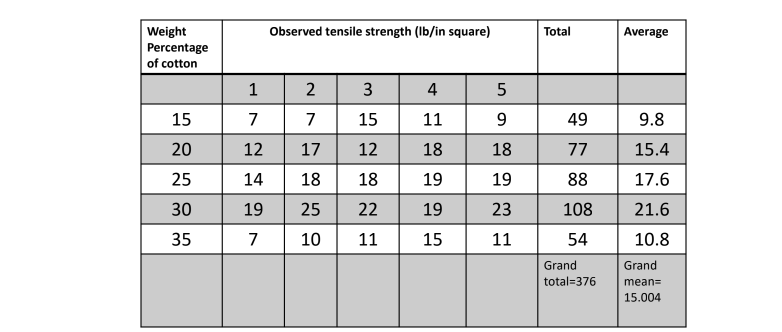

In [16]:
scipy.stats.f.ppf(1-0.05,dfn = 4, dfd = 20)

2.8660814020156584

In [63]:
list2 = [[7,12,14,19,7],[7,17,18,25,10],[15,12,18,22,11],[11,18,19,19,15],[9,18,19,23,11]]

data2 = pd.DataFrame(list2, columns=['cot15', 'cot20', 'cot25','cot30','cot35'])
data2

,cot15,cot20,cot25,cot30,cot35
0,7,12,14,19,7
1,7,17,18,25,10
2,15,12,18,22,11
3,11,18,19,19,15
4,9,18,19,23,11


In [64]:
data_r2 = pd.melt(data2.reset_index(), id_vars=['index'], value_vars = ['cot15', 'cot20', 'cot25','cot30','cot35'])
data_r2.columns = ['index','treatments','value']

data_r2

,index,treatments,value
0,0,cot15,7
1,1,cot15,7
2,2,cot15,15
3,3,cot15,11
4,4,cot15,9
5,0,cot20,12
6,1,cot20,17
7,2,cot20,12
8,3,cot20,18
9,4,cot20,18


In [65]:
mc2 = MultiComparison(data_r2['value'],data_r2['treatments'])
mcresults = mc2.tukeyhsd(0.05)
mcresults.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
cot15,cot20,5.6,0.0385,0.2266,10.9734,True
cot15,cot25,7.8,0.0026,2.4266,13.1734,True
cot15,cot30,11.8,0.001,6.4266,17.1734,True
cot15,cot35,1.0,0.9,-4.3734,6.3734,False
cot20,cot25,2.2,0.7148,-3.1734,7.5734,False
cot20,cot30,6.2,0.0189,0.8266,11.5734,True
cot20,cot35,-4.6,0.1165,-9.9734,0.7734,False
cot25,cot30,4.0,0.2102,-1.3734,9.3734,False
cot25,cot35,-6.8,0.0091,-12.1734,-1.4266,True
cot30,cot35,-10.8,0.001,-16.1734,-5.4266,True


### Randomized Block Design
- Its purpose is to control some of the extraneous sources of variation by removing such variation from the MSE term.
- This design tends to provide a better estimate of the true error variance and leads to a more powerful hypothesis test in terms of the ability to detect differences among treatment means.

**Ques** Air Traffic Controller Stress Test

-  A study measuring the fatigue and stress of air traffic controllers resulted in proposals for modification and redesign of the controller’s work station
- After consideration of several designs for the work station, three specific alternatives are selected as having the best potential for reducing controller stress
- The key question is: To what extent do the three alternatives differ in terms of their effect on controller stress?
- In a completely randomized design, a random sample of controllers would be assigned to each work station alternative.
- However, controllers are believed to differ substantially in their ability to handle stressful situations.
- What is high stress to one controller might be only moderate or even low stress to another.
- Hence, when considering the within-group source of variation (MSE), we must realize that this variation includes both random error and error due to individual controller differences.
- In fact, managers expected controller variability to be a major contributor to the MSE term.

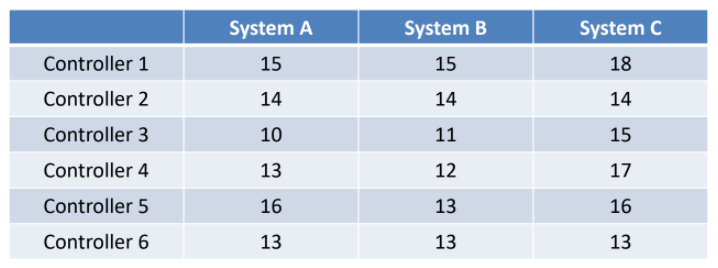

In [66]:
list3 = [[15,15,18],[14,14,14],[10,11,15],[13,12,17],[16,13,16],[13,13,13]]

data3 = pd.DataFrame(list3, columns=['Sys A', 'Sys B', 'Sys C'])
data3

,Sys A,Sys B,Sys C
0,15,15,18
1,14,14,14
2,10,11,15
3,13,12,17
4,16,13,16
5,13,13,13


In [67]:
data_r3 = pd.melt(data3.reset_index(), id_vars=['index'], value_vars = ['Sys A', 'Sys B', 'Sys C'])
data_r3.columns = ['index','treatments','value']

data_r3

,index,treatments,value
0,0,Sys A,15
1,1,Sys A,14
2,2,Sys A,10
3,3,Sys A,13
4,4,Sys A,16
5,5,Sys A,13
6,0,Sys B,15
7,1,Sys B,14
8,2,Sys B,11
9,3,Sys B,12


In [68]:
model3 = ols('value ~ C(treatments)', data = data_r3).fit()
anova_table = sm.stats.anova_lm(model3,typ = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,21.0,10.500000,3.214286,0.068903
Residual,15.0,49.0,3.266667,NaN,NaN


Solving RBD example using python

In [30]:
data_r4 = pd.melt(data3.reset_index(), id_vars=['index'], value_vars = ['Sys A', 'Sys B', 'Sys C'])
data_r4.columns = ['blocks','treatments','value']

data_r4

,blocks,treatments,value
0,0,Sys A,15
1,1,Sys A,14
2,2,Sys A,10
3,3,Sys A,13
4,4,Sys A,16
5,5,Sys A,13
6,0,Sys B,15
7,1,Sys B,14
8,2,Sys B,11
9,3,Sys B,12


In [69]:
model4 = ols('value ~ C(blocks) + C(treatments)', data = data_r4).fit()
anova_table = sm.stats.anova_lm(model4,typ = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(blocks),5.0,30.0,6.0,3.157895,0.057399
C(treatments),2.0,21.0,10.5,5.526316,0.024181
Residual,10.0,19.0,1.9,NaN,NaN


**Ques** 
An experiment was performed to determine the effect of four different
chemicals on the strength of a fabric.
-  These chemicals are used as part of the permanent press finishing process.
- Five fabric samples were selected, and a randomized complete block design was run by testing each chemical type once in random order on each fabric sample.
- The data are shown in Table.
- We will test for differences in means using an ANOVA with alpha = 0.01.

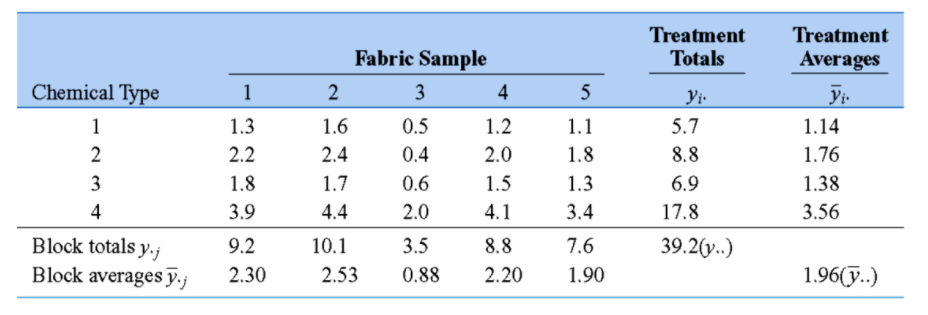

In [70]:
list5 = [[1.3,2.2,1.8,3.9],[1.6,2.4,1.7,4.4],[0.5,0.4,0.6,2.0],[1.2,2.0,1.5,4.1],[1.1,1.8,1.3,3.4]]

data5 = pd.DataFrame(list5, columns=['Chem 1', 'Chem 2', 'Chem 3','Chem 4'])
data5

,Chem 1,Chem 2,Chem 3,Chem 4
0,1.3,2.2,1.8,3.9
1,1.6,2.4,1.7,4.4
2,0.5,0.4,0.6,2.0
3,1.2,2.0,1.5,4.1
4,1.1,1.8,1.3,3.4


In [71]:
data_r5 = pd.melt(data5.reset_index(), id_vars=['index'], value_vars = ['Chem 1', 'Chem 2', 'Chem 3','Chem 4'])
data_r5.columns = ['index','treatments','value']

data_r5

,index,treatments,value
0,0,Chem 1,1.3
1,1,Chem 1,1.6
2,2,Chem 1,0.5
3,3,Chem 1,1.2
4,4,Chem 1,1.1
5,0,Chem 2,2.2
6,1,Chem 2,2.4
7,2,Chem 2,0.4
8,3,Chem 2,2.0
9,4,Chem 2,1.8


In [72]:
model5 = ols('value ~ C(treatments)', data = data_r5).fit()
anova_table = sm.stats.anova_lm(model5,typ = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,18.044,6.014667,12.589569,0.000176
Residual,16.0,7.644,0.477750,NaN,NaN


Solving RBD example using python

In [73]:
data_r6 = pd.melt(data4.reset_index(), id_vars=['index'], value_vars = ['Chem 1', 'Chem 2', 'Chem 3','Chem 4'])
data_r6.columns = ['Fabric','Chemical','value']

data_r6

,Fabric,Chemical,value
0,0,Chem 1,1.3
1,1,Chem 1,1.6
2,2,Chem 1,0.5
3,3,Chem 1,1.2
4,4,Chem 1,1.1
5,0,Chem 2,2.2
6,1,Chem 2,2.4
7,2,Chem 2,0.4
8,3,Chem 2,2.0
9,4,Chem 2,1.8


In [74]:
model6 = ols('value ~ C(Fabric) + C(Chemical)', data = data_r6).fit()
anova_table = sm.stats.anova_lm(model6,typ = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Fabric),4.0,6.693,1.673250,21.113565,2.318913e-05
C(Chemical),3.0,18.044,6.014667,75.894848,4.518310e-08
Residual,12.0,0.951,0.079250,NaN,NaN


## Two Way ANOVA

In [78]:
df = pd.read_excel('datasets/3_Twoway.xlsx')
df

,Value,prep_pro,college
0,500,three_hr,Business
1,580,three_hr,Business
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Artsandscience
5,400,three_hr,Artsandscience
6,460,One-day,Business
7,540,One-day,Business
8,560,One-day,Engineering
9,620,One-day,Engineering


In [83]:
formula = 'Value ~ C(college) + C(prep_pro) + C(college): C(prep_pro)'
model = ols(formula,df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(college),45300.0,2.0,10.269521,0.004757
C(prep_pro),6100.0,2.0,1.382872,0.299436
C(college):C(prep_pro),11200.0,4.0,1.269521,0.350328
Residual,19850.0,9.0,NaN,NaN
